# Generosity During the Pandemic Analysis
##### By [Robin Blades](www.robinblades.com)

### How has the world's generosity changed over the course of the pandemic?

Independent analysis of World Happiness Report data from 2021. 

IMPORTANT NOTE: generosity scores are relative to average income in each country, meaning this analysis is looking at if countries are more/less generous than expected based on income.

Main findings:

1. World average generosity dropped dramatically from 2019 to 2020 and stayed low in 2021.
2. Countries high in generosity in 2019 stayed high in generosity.
3. Countries low in generosity in 2019 decreased drastically in generosity.

*Generosity scores were not correlated with size of country, gdp or size of economic downturn during 2020

These findings resulted in this [D3 story](https://robinblades.github.io/Generosity_WHR/index_generosity.html).

### Configuration

In [7]:
import pandas as pd

### Download and organization of World Happiness Reports from 2019, 2020, and 2021

2021 data downloaded from [kaggle](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

2019 and 2020 data downloaded from [kaggle](https://www.kaggle.com/mathurinache/world-happiness-report)

For the 2020 report, most countries were surveyed after March 11, 2020, when the WHO officially declared a global Covid-19 pandemic, except the following 2 countries:
- Australia
- New Zealand

The generosity data from these countries is pre-pandemic, according to the median interview data.

Data details: 

1,000 individuals from each country were surveyed by the [Gallup World Poll](https://www.gallup.com/178667/gallup-world-poll-work.aspx), typically 3/4 face-to-face and 1/4 over the phone. During the pandemic, all were surveyed online. 

The generosity index is based on their answer to the following question: 
Have you done any of the following in the past month? 
- donated money to a charity?
- volunteered your time to an organization?
- helped a stranger or someone you didn't know who needed help?

Scores are also weighted to ensure that the data is representative of population level statistics for each country (based on gender, age, income, education, urban/rural, etc.).

IMPORTANT NOTE: One caveot to this data is that communities may express their generosity in  ways not captured by the WHR measures. For example, some Nordic countries may have strong social safety nets, and citizens help others by paying taxes. This institutionalized generosity may reduce the prevalence of individual acts of generosity (such as volunteering or donation), and therefore not be captured by the WHR reports.

In [8]:
#this document is a list of median interview dates for each country in 2020 (specially requested)
df_interview_dates = pd.read_csv("WHR-2021.csv")


In [9]:
#read in 2021 WHR data
df_2021 = pd.read_csv("WHR-2021.csv")
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [10]:
#read in 2020 WHR data
df_2020 = pd.read_csv("WHR-2020.csv")
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [11]:
#read in 2019 WHR data
df_2019 = pd.read_csv("WHR-2019.csv")
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Merge 2019, 2020, and 2021 data

In [12]:
#merging all three years: 2019, 2020, 2021
#add 2019 and label vars with year
df = pd.read_csv("WHR-2019.csv")
df = df.add_suffix("_2019")
df.head()

,Overall rank_2019,Country or region_2019,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
#add 2020 and label vars with year
df = df.merge(df_2020.add_suffix("_2020"), left_on='Country or region_2019', right_on='Country name_2020')
df.head()

,Overall rank_2019,Country or region_2019,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Country name_2020,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117


In [14]:
#add 2021 and label vars with year
df = df.merge(df_2021.add_suffix("_2021"), left_on='Country or region_2019', right_on='Country name_2021')
df.head()

,Overall rank_2019,Country or region_2019,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Country name_2020,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Country name_2021,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [15]:
#consolidate country column
df = df.rename(columns = {"Country or region_2019":"Country"})
df = df.drop(columns = ["Country name_2020", "Country name_2021"])
df.head()

,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


### Analysis of world-wide generosity scores

In [16]:
#compare generosity means from 2019, 2020, 2021
g1 = df.Generosity_2019.mean()
g2 = df.Generosity_2020.mean()
g3 = df.Generosity_2021.mean()
print(g1,g2,g3)

0.18029166666666668 -0.01730736698611111 -0.01615277777777778


How has the world average generosity changed over the course of the pandemic?

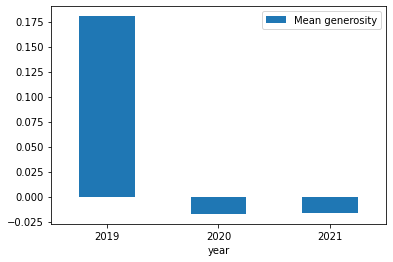

In [17]:
#create bar graph of mean generosity each year
df_gen_means = pd.DataFrame({'year':['2019','2020','2021'], 'Mean generosity':[g1, g2, g3]})
ax = df_gen_means.plot.bar(x='year', y='Mean generosity', rot=0)

In [18]:
#create two new columns to capture the change in generosity scores between the years
#positive scores indicate an increase in generosity
#negative scores indicate a decrease in generosity
df['Change_In_Generosity_2019_2020'] = df['Generosity_2020']-df['Generosity_2019']
df['Change_In_Generosity_2020_2021'] = df['Generosity_2021']-df['Generosity_2020']
df['Change_In_Generosity_2019_2021'] = df['Generosity_2021']-df['Generosity_2019']
df.head()

,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021,Change_In_Generosity_2019_2020,Change_In_Generosity_2020_2021,Change_In_Generosity_2019_2021
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,-0.212482,-0.038518,-0.251
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,-0.185798,-0.036202,-0.222
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580,-0.136467,-0.041533,-0.178
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,-0.107056,-0.086944,-0.194
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,-0.114388,-0.032612,-0.147


In [19]:
# mean change in generosity between 2019 and 2020
df['Change_In_Generosity_2019_2020'].mean() #negative number indicates decrease in generosity

-0.19759903365277778

In [20]:
# mean change in generosity between 2020 and 2021
df['Change_In_Generosity_2020_2021'].mean() #positive number indicates slight increase in generosity

0.0011545892083333327

### Analysis of most/least generous countries 

What countries had the highest generosity scores in the past 3 years?

In [21]:
#countries with the top generosity scores 2019
df.sort_values(by="Generosity_2019",ascending=False).Country.head()

121      Myanmar
85     Indonesia
137        Haiti
21         Malta
112        Kenya
Name: Country, dtype: object

In [22]:
#countries with the top genersoity scores 2020
#no countries from pre-pandemic survey list
df.sort_values(by="Generosity_2020",ascending=False).Country.head()

121      Myanmar
85     Indonesia
137        Haiti
111       Gambia
112        Kenya
Name: Country, dtype: object

In [23]:
#countries with the top genersoity scores 2021
df.sort_values(by="Generosity_2021",ascending=False).Country.head()

85      Indonesia
121       Myanmar
111        Gambia
137         Haiti
37     Uzbekistan
Name: Country, dtype: object

What countries had the lowest generosity scores in the past 3 years?

In [24]:
#countries with the bottom generosity scores 2019
df.sort_values(by="Generosity_2019").Country.head()

76         Greece
138      Botswana
83     Azerbaijan
82        Morocco
96          Gabon
Name: Country, dtype: object

In [25]:
#countries with the bottom generosity scores 2020
df.sort_values(by="Generosity_2020").Country.head()
#no countries from pre-pandemic survey list

76         Greece
138      Botswana
54          Japan
82        Morocco
83     Azerbaijan
Name: Country, dtype: object

In [26]:
#countries with the bottom generosity scores 2021
df.sort_values(by="Generosity_2021").Country.head()

76       Greece
54        Japan
138    Botswana
61     Portugal
110     Georgia
Name: Country, dtype: object

Most generous countries graph

(0.498, 0.519586504, 0.542)


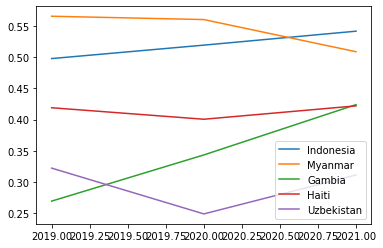

In [27]:
#create line graph of top countries' generosity scores each year: 
# Indonesia, Myanmar, Gambia, Haiti, Uzbekistan

indo_array = float(df[df.Country == "Indonesia"].Generosity_2019), float(df[df.Country == "Indonesia"].Generosity_2020), float(df[df.Country == "Indonesia"].Generosity_2021)    
myan_array = float(df[df.Country == "Myanmar"].Generosity_2019), float(df[df.Country == "Myanmar"].Generosity_2020), float(df[df.Country == "Myanmar"].Generosity_2021)    
gambia_array =  float(df[df.Country == "Gambia"].Generosity_2019), float(df[df.Country == "Gambia"].Generosity_2020), float(df[df.Country == "Gambia"].Generosity_2021)    
haiti_array =  float(df[df.Country == "Haiti"].Generosity_2019), float(df[df.Country == "Haiti"].Generosity_2020), float(df[df.Country == "Haiti"].Generosity_2021)    
uzb_array =  float(df[df.Country == "Uzbekistan"].Generosity_2019), float(df[df.Country == "Uzbekistan"].Generosity_2020), float(df[df.Country == "Uzbekistan"].Generosity_2021)    

print(indo_array)
df_gen_top_countries = pd.DataFrame({
    'Indonesia': indo_array,
    'Myanmar': myan_array,
    'Gambia': gambia_array,
    'Haiti': haiti_array,
    'Uzbekistan': uzb_array,
    }, index = [2019,2020,2021])
lines = df_gen_top_countries.plot.line()

### Comparison to the United States

In [28]:
# United States generosity pre-pandemic 2019
df[df.Country == "United States"].Generosity_2019

18    0.28
Name: Generosity_2019, dtype: float64

In [29]:
# United States generosity post-pandemic 2020
df[df.Country == "United States"].Generosity_2020

18    0.149892
Name: Generosity_2020, dtype: float64

In [30]:
# United States generosity post-pandemic 2021
df[df.Country == "United States"].Generosity_2021

18    0.098
Name: Generosity_2021, dtype: float64

In [31]:
#Find z-score for United States in 2019
# A z-score <= -1.645 is significant at the 0.05 level.

df[df.Country == "United States"].Generosity_2019 - df['Generosity_2019'].mean()/df['Generosity_2019'].std(ddof=0)

18   -1.595338
Name: Generosity_2019, dtype: float64

In [32]:
#Find z-score for United States in 2020
# A z-score <= -1.645 is significant at the 0.05 level.

df[df.Country == "United States"].Generosity_2020 - df['Generosity_2020'].mean()/df['Generosity_2020'].std(ddof=0)

18    0.261662
Name: Generosity_2020, dtype: float64

In [33]:
#Find z-score for United States in 2021
# A z-score <= -1.645 is significant at the 0.05 level.

df[df.Country == "United States"].Generosity_2021 - df['Generosity_2021'].mean()/df['Generosity_2021'].std(ddof=0)

18    0.203994
Name: Generosity_2021, dtype: float64

(0.498, 0.519586504, 0.542)


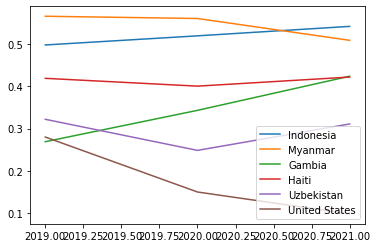

In [34]:
# Graph of United States compared to most generous countries
# Indonesia, Myanmar, Gambia, Haiti, Uzbekistan

indo_array = float(df[df.Country == "Indonesia"].Generosity_2019), float(df[df.Country == "Indonesia"].Generosity_2020), float(df[df.Country == "Indonesia"].Generosity_2021)    
myan_array = float(df[df.Country == "Myanmar"].Generosity_2019), float(df[df.Country == "Myanmar"].Generosity_2020), float(df[df.Country == "Myanmar"].Generosity_2021)    
gambia_array =  float(df[df.Country == "Gambia"].Generosity_2019), float(df[df.Country == "Gambia"].Generosity_2020), float(df[df.Country == "Gambia"].Generosity_2021)    
haiti_array =  float(df[df.Country == "Haiti"].Generosity_2019), float(df[df.Country == "Haiti"].Generosity_2020), float(df[df.Country == "Haiti"].Generosity_2021)    
uzb_array =  float(df[df.Country == "Uzbekistan"].Generosity_2019), float(df[df.Country == "Uzbekistan"].Generosity_2020), float(df[df.Country == "Uzbekistan"].Generosity_2021)    
us_array =  float(df[df.Country == "United States"].Generosity_2019), float(df[df.Country == "United States"].Generosity_2020), float(df[df.Country == "United States"].Generosity_2021)    

print(indo_array)
df_gen_top_countries = pd.DataFrame({
    'Indonesia': indo_array,
    'Myanmar': myan_array,
    'Gambia': gambia_array,
    'Haiti': haiti_array,
    'Uzbekistan': uzb_array,
    'United States': us_array,
    }, index = [2019,2020,2021])
lines = df_gen_top_countries.plot.line()

### Countries with the most change in generosity

In [35]:
#countries with most change in generosity between 2019 and 2020
df.sort_values(by="Change_In_Generosity_2019_2020",ascending=False).Country.head()

111          Gambia
85        Indonesia
121         Myanmar
137           Haiti
80     Turkmenistan
Name: Country, dtype: object

In [36]:
#countries with most change in generosity between 2019 and 2020
df.sort_values(by="Change_In_Generosity_2020_2021",ascending=False).Country.head()

108            Iran
80     Turkmenistan
111          Gambia
65           Serbia
142        Tanzania
Name: Country, dtype: object

In [37]:
#countries with most change in generosity between 2019 and 2021 (over whole pandemic)
df.sort_values(by="Change_In_Generosity_2019_2021",ascending=False).Country.head()

111          Gambia
85        Indonesia
80     Turkmenistan
137           Haiti
42           Kosovo
Name: Country, dtype: object

(0.498, 0.519586504, 0.542)


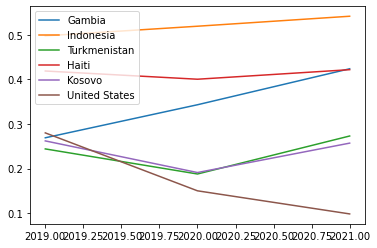

In [38]:
# Graph of countries with most change in generosity scores over whole pandemic
# Gambia, Indonesia, Turkmenistan, Haiti, Kosovo

gambia_array = float(df[df.Country == "Gambia"].Generosity_2019), float(df[df.Country == "Gambia"].Generosity_2020), float(df[df.Country == "Gambia"].Generosity_2021)    
indo_array = float(df[df.Country == "Indonesia"].Generosity_2019), float(df[df.Country == "Indonesia"].Generosity_2020), float(df[df.Country == "Indonesia"].Generosity_2021)    
turk_array =  float(df[df.Country == "Turkmenistan"].Generosity_2019), float(df[df.Country == "Turkmenistan"].Generosity_2020), float(df[df.Country == "Turkmenistan"].Generosity_2021)    
haiti_array =  float(df[df.Country == "Haiti"].Generosity_2019), float(df[df.Country == "Haiti"].Generosity_2020), float(df[df.Country == "Haiti"].Generosity_2021)    
kosovo_array =  float(df[df.Country == "Kosovo"].Generosity_2019), float(df[df.Country == "Kosovo"].Generosity_2020), float(df[df.Country == "Kosovo"].Generosity_2021)    
us_array =  float(df[df.Country == "United States"].Generosity_2019), float(df[df.Country == "United States"].Generosity_2020), float(df[df.Country == "United States"].Generosity_2021)    

print(indo_array)
df_gen_top_countries = pd.DataFrame({
    'Gambia': gambia_array,
    'Indonesia': indo_array,
    'Turkmenistan': turk_array,
    'Haiti': haiti_array,
    'Kosovo': kosovo_array,
    'United States': us_array,
    }, index = [2019,2020,2021])
lines = df_gen_top_countries.plot.line()

### Linear regression
Determine if the difference in generosity scores is significant between 2019 and 2020

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [41]:
df.columns

Index(['Overall rank_2019', 'Country', 'Score_2019', 'GDP per capita_2019',
       'Social support_2019', 'Healthy life expectancy_2019',
       'Freedom to make life choices_2019', 'Generosity_2019',
       'Perceptions of corruption_2019', 'Regional indicator_2020',
       'Ladder score_2020', 'Standard error of ladder score_2020',
       'upperwhisker_2020', 'lowerwhisker_2020', 'Logged GDP per capita_2020',
       'Social support_2020', 'Healthy life expectancy_2020',
       'Freedom to make life choices_2020', 'Generosity_2020',
       'Perceptions of corruption_2020', 'Ladder score in Dystopia_2020',
       'Explained by: Log GDP per capita_2020',
       'Explained by: Social support_2020',
       'Explained by: Healthy life expectancy_2020',
       'Explained by: Freedom to make life choices_2020',
       'Explained by: Generosity_2020',
       'Explained by: Perceptions of corruption_2020',
       'Dystopia + residual_2020', 'Regional indicator_2021',
       'Ladder score_2021'

In [42]:
#predict fourth year score with third year score
import statsmodels.formula.api as smf

model = smf.ols("""
    Generosity_2020 ~ Generosity_2019
""", data=df)

results = model.fit()
results.summary()
#generosity in 2019 highly predictive of 2020 score -- r-squared of .953

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Generosity_2020   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2895.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.49e-96
Time:                        17:43:37   Log-Likelihood:                 284.79
No. Observations:                 144   AIC:                            -565.6
Df Residuals:                     142   BIC:                            -559.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3008      0.006    -50.373      0.000      -0.313      -0.289
Generosity_2019     1.5726      0.029     53.803      0.000       1.515       1.630
==============================================================================
Omnibus:                       87.809   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1079.006
Skew:                           1.832   Prob(JB):                    4.97e-235
Kurtosis:                      15.900   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#gives prediction
df['predicted_gen_2020'] = results.predict()

#difference between actual and predicted value (predicted generosity scores in 2020 - actual 2020 scores)
df['gen_2020_residual'] = results.resid
df.head()

,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021,Change_In_Generosity_2019_2020,Change_In_Generosity_2020_2021,Change_In_Generosity_2019_2021,predicted_gen_2020,gen_2020_residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,-0.212482,-0.038518,-0.251,-0.060226,0.000744
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,-0.185798,-0.036202,-0.222,0.095459,-0.029258
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580,-0.136467,-0.041533,-0.178,0.125338,0.009194
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,-0.107056,-0.086944,-0.194,0.255862,-0.008918
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,-0.114388,-0.032612,-0.147,0.205540,0.002073


In [45]:
df.sort_values(by='gen_2020_residual',ascending=False)

,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021,Change_In_Generosity_2019_2020,Change_In_Generosity_2020_2021,Change_In_Generosity_2019_2021,predicted_gen_2020,gen_2020_residual
111,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,Sub-Saharan Africa,4.7506,0.067164,4.882241,4.618959,7.321815,0.693169,55.012016,0.733163,0.343199,0.690718,1.972317,0.256991,0.882679,0.353248,0.403420,0.425990,0.158094,2.270216,Sub-Saharan Africa,5.051,0.089,5.225,4.877,7.686,0.690,55.160,0.697,0.424,0.746,2.43,0.367,0.511,0.210,0.384,0.465,0.123,2.990,0.074199,0.080801,0.155,0.122193,0.221006
80,87,Turkmenistan,5.247,1.052,1.538,0.657,0.394,0.244,0.028,Commonwealth of Independent States,5.1191,0.029380,5.176684,5.061516,9.748033,0.958966,62.211708,0.826457,0.187672,0.883692,1.972317,1.008964,1.510477,0.612448,0.515237,0.323129,0.033504,1.115337,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409,-0.056328,0.085328,0.029,0.082879,0.104793
42,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006,Central and Eastern Europe,6.3252,0.052216,6.427544,6.222856,9.204430,0.820727,63.885555,0.861536,0.190934,0.922328,1.972317,0.840481,1.183963,0.672709,0.557280,0.325287,0.008559,2.736903,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,0.257,0.917,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182,-0.071066,0.066066,-0.005,0.111185,0.079749
81,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242,-0.194105,0.054105,-0.140,-0.186032,0.064926
109,118,Guinea,4.534,0.380,0.829,0.375,0.332,0.207,0.086,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.750990,0.637573,54.467800,0.706847,0.076328,0.761794,1.972317,0.390008,0.751366,0.333655,0.371878,0.249491,0.112205,2.740730,Sub-Saharan Africa,4.984,0.090,5.160,4.808,7.838,0.639,55.008,0.697,0.095,0.766,2.43,0.420,0.399,0.206,0.384,0.250,0.111,3.216,-0.130672,0.018672,-0.112,0.024693,0.051635
45,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041,Western Europe,6.1590,0.050606,6.258188,6.059812,10.405703,0.805996,73.702225,0.779858,0.043731,0.856272,1.972317,1.212799,1.149171,1.026125,0.459386,0.227932,0.051207,2.032335,Western Europe,6.223,0.049,6.319,6.128,10.576,0.802,73.898,0.763,-0.015,0.844,2.43,1.377,0.765,0.801,0.464,0.178,0.061,2.578,-0.146269,-0.058731,-0.205,-0.002040,0.045772
130,140,India,4.015,0.755,0.765,0.588,0.49

In [46]:
df['error_std_dev'] = results.resid / np.sqrt(results.mse_resid) #how much variation normally
df.head()


,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021,Change_In_Generosity_2019_2020,Change_In_Generosity_2020_2021,Change_In_Generosity_2019_2021,predicted_gen_2020,gen_2020_residual,error_std_dev
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,-0.212482,-0.038518,-0.251,-0.060226,0.000744,0.022051
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,-0.185798,-0.036202,-0.222,0.095459,-0.029258,-0.867668
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580,-0.136467,-0.041533,-0.178,0.125338,0.009194,0.272669
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,-0.107056,-0.086944,-0.194,0.255862,-0.008918,-0.264468
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,-0.114388,-0.032612,-0.147,0.205540,0.002073,0.061472


In [47]:
df.sort_values(by='error_std_dev',ascending=False)
#more/less than 2 is beyond normal deviation
#significant increase in generosity: gambia, turkmenistan, kosovo

,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021,Change_In_Generosity_2019_2020,Change_In_Generosity_2020_2021,Change_In_Generosity_2019_2021,predicted_gen_2020,gen_2020_residual,error_std_dev
111,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,Sub-Saharan Africa,4.7506,0.067164,4.882241,4.618959,7.321815,0.693169,55.012016,0.733163,0.343199,0.690718,1.972317,0.256991,0.882679,0.353248,0.403420,0.425990,0.158094,2.270216,Sub-Saharan Africa,5.051,0.089,5.225,4.877,7.686,0.690,55.160,0.697,0.424,0.746,2.43,0.367,0.511,0.210,0.384,0.465,0.123,2.990,0.074199,0.080801,0.155,0.122193,0.221006,6.554179
80,87,Turkmenistan,5.247,1.052,1.538,0.657,0.394,0.244,0.028,Commonwealth of Independent States,5.1191,0.029380,5.176684,5.061516,9.748033,0.958966,62.211708,0.826457,0.187672,0.883692,1.972317,1.008964,1.510477,0.612448,0.515237,0.323129,0.033504,1.115337,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409,-0.056328,0.085328,0.029,0.082879,0.104793,3.107752
42,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006,Central and Eastern Europe,6.3252,0.052216,6.427544,6.222856,9.204430,0.820727,63.885555,0.861536,0.190934,0.922328,1.972317,0.840481,1.183963,0.672709,0.557280,0.325287,0.008559,2.736903,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,0.257,0.917,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182,-0.071066,0.066066,-0.005,0.111185,0.079749,2.365039
81,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242,-0.194105,0.054105,-0.140,-0.186032,0.064926,1.925468
109,118,Guinea,4.534,0.380,0.829,0.375,0.332,0.207,0.086,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.750990,0.637573,54.467800,0.706847,0.076328,0.761794,1.972317,0.390008,0.751366,0.333655,0.371878,0.249491,0.112205,2.740730,Sub-Saharan Africa,4.984,0.090,5.160,4.808,7.838,0.639,55.008,0.697,0.095,0.766,2.43,0.420,0.399,0.206,0.384,0.250,0.111,3.216,-0.130672,0.018672,-0.112,0.024693,0.051635,1.531296
45,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041,Western Europe,6.1590,0.050606,6.258188,6.059812,10.405703,0.805996,73.702225,0.779858,0.043731,0.856272,1.972317,1.212799,1.149171,1.026125,0.459386,0.227932,0.051207,2.032335,Western Europe,6.223,0.049,6.319,6.128,10.576,0.802,73.898,0.763,-0.015,0.844,2.43,1.377,0.765,0.801,0.464,0.178,0.061,2.578,-0.146269,-0.058731,-0.205,-0

(0.498, 0.519586504, 0.542)


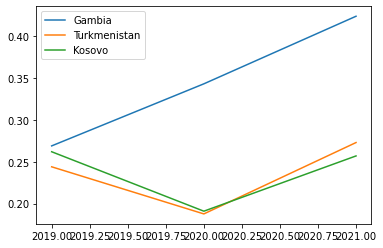

In [60]:
# Graph of countries with significant increase in generosity
# gambia, turkmenistan, kosovo, algeria

gambia_array = float(df[df.Country == "Gambia"].Generosity_2019), float(df[df.Country == "Gambia"].Generosity_2020), float(df[df.Country == "Gambia"].Generosity_2021)    
turk_array =  float(df[df.Country == "Turkmenistan"].Generosity_2019), float(df[df.Country == "Turkmenistan"].Generosity_2020), float(df[df.Country == "Turkmenistan"].Generosity_2021)    
kosovo_array =  float(df[df.Country == "Kosovo"].Generosity_2019), float(df[df.Country == "Kosovo"].Generosity_2020), float(df[df.Country == "Kosovo"].Generosity_2021)    

print(indo_array)
df_gen_top_countries = pd.DataFrame({
    'Gambia': gambia_array,
    'Turkmenistan': turk_array,
    'Kosovo': kosovo_array,
    }, index = [2019,2020,2021])
lines = df_gen_top_countries.plot.line()

In [48]:
df.sort_values(by='error_std_dev',ascending=True)
#more/less than 2 is beyond normal deviation
#significant decrease in generosity: singapore, poland, tajikistan, malta

,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021,Change_In_Generosity_2019_2020,Change_In_Generosity_2020_2021,Change_In_Generosity_2019_2021,predicted_gen_2020,gen_2020_residual,error_std_dev
31,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,Southeast Asia,6.3771,0.033259,6.442287,6.311913,11.395521,0.910269,76.804581,0.926645,0.029879,0.109784,1.972317,1.519580,1.395457,1.137814,0.635317,0.218771,0.533162,0.937032,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379,-0.241121,-0.047879,-0.289,0.125338,-0.095459,-2.830951
36,40,Poland,6.182,1.206,1.438,0.884,0.483,0.117,0.050,Central and Eastern Europe,6.1863,0.035500,6.255880,6.116719,10.265124,0.874257,69.311134,0.862056,-0.205084,0.686927,1.972317,1.169229,1.310400,0.868038,0.557904,0.063374,0.160541,2.056798,Central and Eastern Europe,6.166,0.040,6.245,6.087,10.382,0.898,69.702,0.841,-0.165,0.735,2.43,1.309,0.982,0.668,0.558,0.080,0.130,2.438,-0.322084,0.040084,-0.282,-0.116838,-0.088246,-2.617033
69,74,Tajikistan,5.467,0.493,1.098,0.718,0.389,0.230,0.144,Commonwealth of Independent States,5.5557,0.032322,5.619050,5.492350,8.024811,0.835297,64.104591,0.831383,-0.025089,0.592076,1.972317,0.474875,1.218378,0.680595,0.521141,0.182417,0.221780,2.256508,Commonwealth of Independent States,5.466,0.034,5.532,5.400,8.091,0.860,64.281,0.832,-0.056,0.553,2.43,0.508,0.895,0.498,0.548,0.152,0.247,2.619,-0.255089,-0.030911,-0.286,0.060863,-0.085951,-2.548984
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151,Western Europe,6.7728,0.042958,6.856998,6.688602,10.533838,0.930380,72.199997,0.924911,0.214966,0.658547,1.972317,1.252513,1.442957,0.972042,0.633239,0.341181,0.178864,1.952012,Western Europe,6.602,0.044,6.688,6.516,10.674,0.931,72.200,0.927,0.133,0.653,2.43,1.411,1.055,0.747,0.664,0.275,0.183,2.268,-0.160034,-0.081966,-0.242,0.288886,-0.073920,-2.192193
24,26,Chile,6.444,1.159,1.369,0.920,0.357,0.187,0.056,Latin America and Caribbean,6.2285,0.045724,6.318119,6.138881,10.032055,0.879714,69.900620,0.744896,-0.065668,0.838239,1.972317,1.096992,1.323287,0.889261,0.417482,0.155579,0.062849,2.283013,Latin America and Caribbean,6.172,0.046,6.262,6.081,10.071,0.882,70.000,0.742,-0.044,0.830,2.43,1.200,0.946,0.678,0.438,0.159,0.070,2.682,-0.252668,0.021668,-0.231,-0.006758,-0.058910,-1.747056
53,57,Mauritius,5.888,1.120,1.402,0.798,0.498,0.215,0.060,Sub-Saharan Africa,6.1013,0.057226,6.213464,5.989136,9.956786,0.910358,66.404343,0.889535,-0.018319,0.805343,1.972317,1.073664,1.395667,0.763389,0.590838,0.186895,0.084088,2.006721,Sub-Saharan Africa,6.049,0.059,6.165,5.933,10.008,0.905,66.701,0.867,-0.054,0.789,2.43,1.178,0.996,0.574,0.590,0.153,0.096,2.462,-0.233319,-0

(0.498, 0.519586504, 0.542)


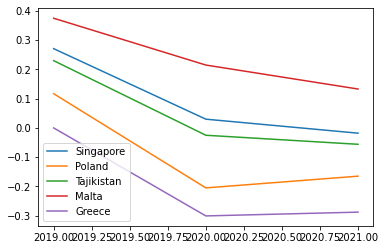

In [65]:
### Graph of countries with significant decrease in generosity
# singapore, poland, tajikistan, malta

sing_array = float(df[df.Country == "Singapore"].Generosity_2019), float(df[df.Country == "Singapore"].Generosity_2020), float(df[df.Country == "Singapore"].Generosity_2021)    
poland_array =  float(df[df.Country == "Poland"].Generosity_2019), float(df[df.Country == "Poland"].Generosity_2020), float(df[df.Country == "Poland"].Generosity_2021)    
tajikistan_array =  float(df[df.Country == "Tajikistan"].Generosity_2019), float(df[df.Country == "Tajikistan"].Generosity_2020), float(df[df.Country == "Tajikistan"].Generosity_2021)    
malta_array =  float(df[df.Country == "Malta"].Generosity_2019), float(df[df.Country == "Malta"].Generosity_2020), float(df[df.Country == "Malta"].Generosity_2021)    
gre_array =  float(df[df.Country == "Greece"].Generosity_2019), float(df[df.Country == "Greece"].Generosity_2020), float(df[df.Country == "Greece"].Generosity_2021)    


print(indo_array)
df_gen_top_countries = pd.DataFrame({
    'Singapore': sing_array,
    'Poland': poland_array,
    'Tajikistan': tajikistan_array,
    'Malta': malta_array,
    'Greece': gre_array
    }, index = [2019,2020,2021])
lines = df_gen_top_countries.plot.line()

In [49]:
df[df['Country']=="United States"]
#no significant change

,Overall rank_2019,Country,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Regional indicator_2020,Ladder score_2020,Standard error of ladder score_2020,upperwhisker_2020,lowerwhisker_2020,Logged GDP per capita_2020,Social support_2020,Healthy life expectancy_2020,Freedom to make life choices_2020,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia_2020,Explained by: Log GDP per capita_2020,Explained by: Social support_2020,Explained by: Healthy life expectancy_2020,Explained by: Freedom to make life choices_2020,Explained by: Generosity_2020,Explained by: Perceptions of corruption_2020,Dystopia + residual_2020,Regional indicator_2021,Ladder score_2021,Standard error of ladder score_2021,upperwhisker_2021,lowerwhisker_2021,Logged GDP per capita_2021,Social support_2021,Healthy life expectancy_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021,Ladder score in Dystopia_2021,Explained by: Log GDP per capita_2021,Explained by: Social support_2021,Explained by: Healthy life expectancy_2021,Explained by: Freedom to make life choices_2021,Explained by: Generosity_2021,Explained by: Perceptions of corruption_2021,Dystopia + residual_2021,Change_In_Generosity_2019_2020,Change_In_Generosity_2020_2021,Change_In_Generosity_2019_2021,predicted_gen_2020,gen_2020_residual,error_std_dev
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128,North America and ANZ,6.9396,0.047316,7.03234,6.84686,10.925769,0.914219,68.2995,0.84262,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.92,68.2,0.837,0.098,0.698,2.43,1.533,1.03,0.621,0.554,0.252,0.154,2.807,-0.130108,-0.051892,-0.182,0.139491,0.0104,0.308432


In [51]:
import seaborn as sns

<AxesSubplot:xlabel='Generosity_2019', ylabel='Generosity_2020'>

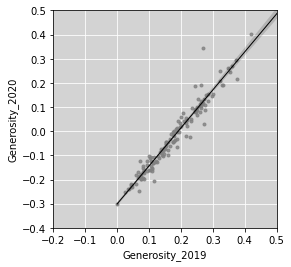

In [58]:
fig, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(-0.2, .5)
ax.set_ylim(-0.4, .5)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

sns.regplot(x='Generosity_2019',
            y='Generosity_2020',
            data=df,
            marker='.',
            line_kws={'color': 'black', 'linewidth': 1 },
            scatter_kws={'color': 'grey'},
            ax=ax)

### Create dataset for D3 graphing
Including country, region, log gdp, and generosity scores for 2019, 2020, 2021

In [209]:
#create dataset with only generosity scores from 2019, 2020, and 2021
column_names = ["Country","Region","GDP_2019","Gen_2019","Log_GDP_2020","Gen_2020","Log_GDP_2021","Gen_2021"]
df_generosity = pd.DataFrame(zip(df['Country'], df['Regional indicator_2021'], df['GDP per capita_2019'], df['Generosity_2019'], df['Logged GDP per capita_2020'], df['Generosity_2020'], df['Logged GDP per capita_2021'], df['Generosity_2021']), columns = column_names)
df_generosity

,Country,Region,GDP_2019,Gen_2019,Log_GDP_2020,Gen_2020,Log_GDP_2021,Gen_2021
0,Finland,Western Europe,1.340,0.153,10.639267,-0.059482,10.775,-0.098
1,Denmark,Western Europe,1.383,0.252,10.774001,0.066202,10.933,0.030
2,Norway,Western Europe,1.488,0.271,11.087804,0.134533,11.053,0.093
3,Iceland,Western Europe,1.380,0.354,10.772559,0.246944,10.878,0.160
4,Netherlands,Western Europe,1.396,0.322,10.812712,0.207612,10.932,0.175
...,...,...,...,...,...,...,...,...
139,Malawi,Sub-Saharan Africa,0.191,0.218,7.062226,0.021433,6.958,0.038
140,Yemen,Middle East and North Africa,0.287,0.108,7.759683,-0.157735,7.578,-0.147
141,Rwanda,Sub-Saharan Africa,0.359,0.217,7.600104,0.055484,7.676,0.061
142,Tanzania,Sub-Saharan Africa,0.476,0.276,7.967665,0.109669,7.876,0.183


In [210]:
#2019 GDP is not logged
#need to get logged 2019 GDP
df_gdp = pd.read_excel("DataPanelWHR2021C2.xls")
#from https://www.kaggle.com/akshaydayanandan/world-happiness-report-2021-eda/notebook

In [211]:
df_gdp_2019 = df_gdp[df_gdp['year'] == 2019]
df_gdp_2019

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375092,7.697248,0.419973,52.400002,0.393656,-0.108459,0.923849,0.351387,0.502474
23,Albania,2019,4.995318,9.544080,0.686365,69.000000,0.777351,-0.099263,0.914284,0.681080,0.273827
32,Algeria,2019,4.744627,9.336946,0.803259,66.099998,0.385083,0.005087,0.740609,0.584944,0.215198
50,Argentina,2019,6.085561,10.000340,0.896371,69.000000,0.817053,-0.210719,0.830460,0.825965,0.319055
65,Armenia,2019,5.488087,9.521770,0.781604,67.199997,0.844324,-0.172369,0.583473,0.598238,0.430463
...,...,...,...,...,...,...,...,...,...,...,...
1892,Venezuela,2019,5.080803,NaN,0.887672,66.699997,0.625526,NaN,0.839340,0.761240,0.350950
1907,Vietnam,2019,5.467451,8.992331,0.847592,68.099998,0.952469,-0.125531,0.787889,0.751160,0.185610
1919,Yemen,2019,4.196913,NaN,0.870043,57.500000,0.651308,NaN,0.798228,0.542806,0.213043
1932,Zambia,2019,3.306797,8.154642,0.637894,55.799999,0.811040,0.077462,0.831956,0.743407,0.394385


In [212]:
#add logged gdp 2019 to output file
df_generosity = df_generosity.merge(df_gdp_2019[['Country name','Log GDP per capita']], how='left', left_on='Country', right_on='Country name')
df_generosity.head()

,Country,Region,GDP_2019,Gen_2019,Log_GDP_2020,Gen_2020,Log_GDP_2021,Gen_2021,Country name,Log GDP per capita
0,Finland,Western Europe,1.340,0.153,10.639267,-0.059482,10.775,-0.098,Finland,10.791813
1,Denmark,Western Europe,1.383,0.252,10.774001,0.066202,10.933,0.030,Denmark,10.954033
2,Norway,Western Europe,1.488,0.271,11.087804,0.134533,11.053,0.093,Norway,11.060889
3,Iceland,Western Europe,1.380,0.354,10.772559,0.246944,10.878,0.160,Iceland,10.930854
4,Netherlands,Western Europe,1.396,0.322,10.812712,0.207612,10.932,0.175,Netherlands,10.953283


In [213]:
#clean up columns
df_generosity = df_generosity.drop(columns=['GDP_2019','Country name'])
df_generosity = df_generosity.rename(columns={'Log GDP per capita':'Log_GDP_2019'})

In [214]:
#add population as well for size of bubbles
# from world bank: https://data.worldbank.org/indicator/SP.POP.TOTL
df_pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_2708397.csv")
df_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [215]:
#add logged gdp 2019 to output file
df_generosity = df_generosity.merge(df_pop[['Country Name','2019','2020']], how='left', left_on='Country', right_on='Country Name')
df_generosity.head()

,Country,Region,Gen_2019,Log_GDP_2020,Gen_2020,Log_GDP_2021,Gen_2021,Log_GDP_2019,Country Name,2019,2020
0,Finland,Western Europe,0.153,10.639267,-0.059482,10.775,-0.098,10.791813,Finland,5521606.0,5530719.0
1,Denmark,Western Europe,0.252,10.774001,0.066202,10.933,0.030,10.954033,Denmark,5814422.0,5831404.0
2,Norway,Western Europe,0.271,11.087804,0.134533,11.053,0.093,11.060889,Norway,5347896.0,5379475.0
3,Iceland,Western Europe,0.354,10.772559,0.246944,10.878,0.160,10.930854,Iceland,360563.0,366425.0
4,Netherlands,Western Europe,0.322,10.812712,0.207612,10.932,0.175,10.953283,Netherlands,17344874.0,17441139.0


In [219]:
#clean up columns
df_generosity = df_generosity.drop(columns=['Country Name'])
df_generosity = df_generosity.rename(columns={'2019':'Pop_2019','2020':'Pop_2020'})

KeyError: "['Country Name'] not found in axis"

In [220]:
#bc 2021 population data not released yet, will repeat 2020 values
df_generosity['Pop_2021'] = df_generosity['Pop_2020']

In [221]:
df_generosity.shape
df_generosity

,Country,Region,Gen_2019,Log_GDP_2020,Gen_2020,Log_GDP_2021,Gen_2021,Log_GDP_2019,Pop_2019,Pop_2020,Pop_2021
0,Finland,Western Europe,0.153,10.639267,-0.059482,10.775,-0.098,10.791813,5521606.0,5530719.0,5530719.0
1,Denmark,Western Europe,0.252,10.774001,0.066202,10.933,0.030,10.954033,5814422.0,5831404.0,5831404.0
2,Norway,Western Europe,0.271,11.087804,0.134533,11.053,0.093,11.060889,5347896.0,5379475.0,5379475.0
3,Iceland,Western Europe,0.354,10.772559,0.246944,10.878,0.160,10.930854,360563.0,366425.0,366425.0
4,Netherlands,Western Europe,0.322,10.812712,0.207612,10.932,0.175,10.953283,17344874.0,17441139.0,17441139.0
...,...,...,...,...,...,...,...,...,...,...,...
139,Malawi,Sub-Saharan Africa,0.218,7.062226,0.021433,6.958,0.038,6.965763,18628749.0,19129955.0,19129955.0
140,Yemen,Middle East and North Africa,0.108,7.759683,-0.157735,7.578,-0.147,NaN,NaN,NaN,NaN
141,Rwanda,Sub-Saharan Africa,0.217,7.600104,0.055484,7.676,0.061,7.708061,12626938.0,12952209.0,12952209.0
142,Tanzania,Sub-Saharan Africa,0.276,7.967665,0.109669,7.876,0.183,7.886240,58005461.0,59734213.0,59734213.0


In [222]:
#output file
df_generosity.to_csv("WHR_Generosity&GDP_2019_2020_2021.csv")

In [224]:
#in csv file, columns are combined to suit format for bubbles d3 graphic
#NA are filled in with value from previous year
df_generosity['Region'].unique()

array(['Western Europe', 'North America and ANZ',
       'Latin America and Caribbean', 'Middle East and North Africa',
       'Central and Eastern Europe', 'Southeast Asia',
       'Commonwealth of Independent States', 'East Asia',
       'Sub-Saharan Africa', 'South Asia'], dtype=object)